<a href="https://colab.research.google.com/github/Mehmetaliturhan000/CarClassification/blob/main/FaceMaskDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

app.py	data  face-mask-dataset.zip  kaggle.json  sample_data  test_pic.2.png  test_pic.png


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3357.jpg', 'with_mask_3277.jpg', 'with_mask_3457.jpg', 'with_mask_2393.jpg', 'with_mask_3503.jpg']
['with_mask_36.jpg', 'with_mask_3134.jpg', 'with_mask_2679.jpg', 'with_mask_672.jpg', 'with_mask_2336.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2792.jpg', 'without_mask_1980.jpg', 'without_mask_2336.jpg', 'without_mask_3181.jpg', 'without_mask_236.jpg']
['without_mask_3005.jpg', 'without_mask_3329.jpg', 'without_mask_1503.jpg', 'without_mask_2360.jpg', 'without_mask_1382.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for two class of images

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

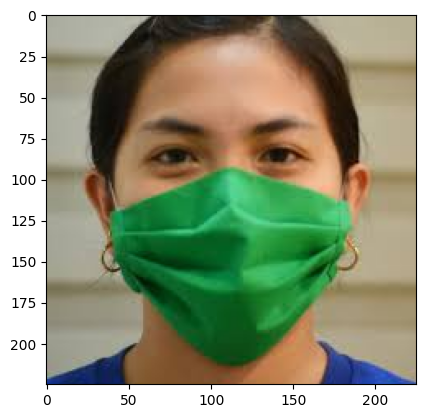

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3000.jpg')
imgplot = plt.imshow(img)
plt.show()

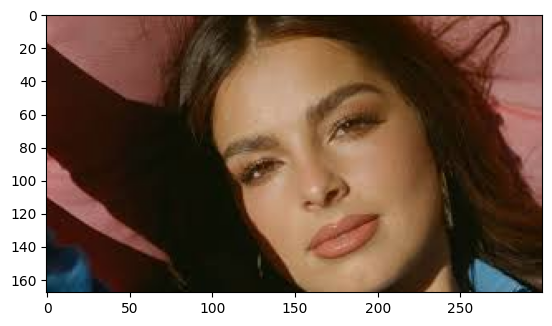

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3083.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Step 1 Resize the Images

Step 2 Convert the images to numpy arrays



In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[ 43,  34,  29],
        [ 43,  34,  29],
        [ 44,  35,  29],
        ...,
        [ 27,  36,  33],
        [ 26,  34,  34],
        [ 26,  34,  36]],

       [[ 50,  41,  37],
        [ 50,  41,  37],
        [ 50,  41,  37],
        ...,
        [ 27,  36,  33],
        [ 27,  36,  33],
        [ 27,  35,  34]],

       [[ 60,  52,  51],
        [ 58,  53,  51],
        [ 59,  53,  50],
        ...,
        [ 28,  37,  34],
        [ 26,  35,  32],
        [ 27,  36,  35]],

       ...,

       [[182, 199, 216],
        [184, 200, 217],
        [185, 202, 218],
        ...,
        [ 28,  37,  53],
        [ 68,  66,  68],
        [114, 106,  91]],

       [[179, 196, 215],
        [179, 198, 215],
        [180, 199, 215],
        ...,
        [ 33,  41,  58],
        [ 72,  68,  69],
        [112, 103,  89]],

       [[174, 194, 212],
        [175, 196, 213],
        [176, 197, 214],
        ...,
        [ 33,  40,  57],
        [ 74,  70,  71],
        [113, 103,  90]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [237, 229, 218],
        [237, 229, 218],
        [237, 229, 218]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [237, 229, 218],
        [237, 229, 218],
        [237, 229, 218]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [237, 229, 218],
        [237, 229, 218],
        [237, 229, 218]],

       ...,

       [[ 36,  36,  38],
        [ 32,  32,  34],
        [ 36,  36,  38],
        ...,
        [ 29,  28,  30],
        [ 20,  20,  22],
        [ 31,  31,  33]],

       [[ 36,  35,  39],
        [ 32,  32,  36],
        [ 38,  38,  41],
        ...,
        [ 32,  32,  34],
        [ 19,  19,  21],
        [ 29,  29,  31]],

       [[ 35,  34,  40],
        [ 33,  32,  38],
        [ 41,  40,  46],
        ...,
        [ 36,  37,  39],
        [ 17,  18,  20],
        [ 24,  25,  27]]

In [ ]:
X_train_scaled[0]

array([[[0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        ...,
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196]],

       [[0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        ...,
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196]],

       [[0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        [0.91764706, 0.88235294, 0.84705882],
        ...,
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196],
        [0.92941176, 0.89803922, 0.85490196]],

       ...,

       [[0.14117647, 0.14117647, 0.14901961],
        [0.1254902 , 0.1254902 , 0.13333333],
        [0.14117647, 0

Building a Convolutional Neural Network (CNN) with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 12s 25ms/step - loss: 0.5754 - acc: 0.7026 - val_loss: 0.4620 - val_acc: 0.8066
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3432 - acc: 0.8720 - val_loss: 0.3083 - val_acc: 0.8628
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2856 - acc: 0.8825 - val_loss: 0.2372 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2570 - acc: 0.9033 - val_loss: 0.2301 - val_acc: 0.8975
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2102 - acc: 0.9196 - val_loss: 0.2458 - val_acc: 0.8975


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2000 - acc: 0.9193
Test Accuracy = 0.9192587733268738


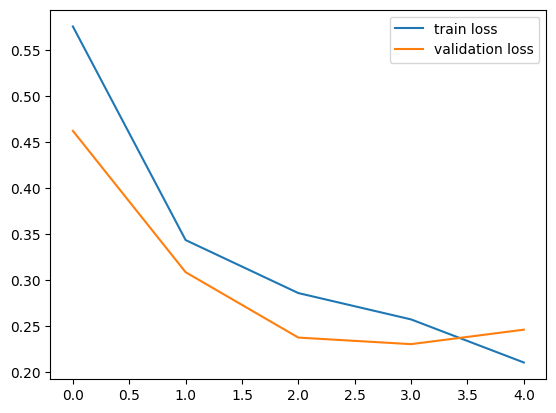

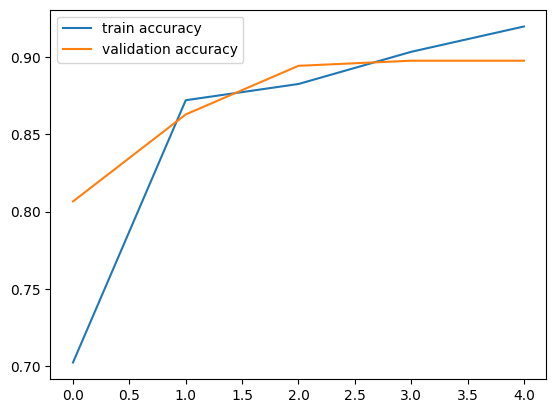

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System


In [ ]:
def new_image_predict(input_image_path):

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)


  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)


  if input_pred_label == 1:

    print('The person in the image is wearing a mask')

  else:

    print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

new_image_predict(input_image_path)

In [ ]:
import joblib

joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.197.135.171


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.197.135.171:8501

npx: installed 22 in 3.521s
your url is: https://eight-meals-fold.loca.lt
2023-11-15 02:50:05.910791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 02:50:05.910854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 02:50:05.910899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 02:50:07.472855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-15 02:50:09.96